In [10]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [12]:
(X_train, y_test) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [13]:
len(X_train)

60000

In [14]:
len(X_test)

10000

In [15]:
X_train[0].shape

(28, 28)

In [16]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

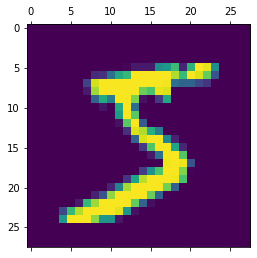

In [17]:
plt.matshow(X_train[0])

In [20]:
print(y_train)

[5 0 4 ... 5 6 8]


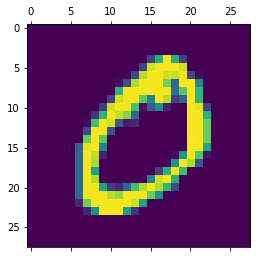

In [23]:
plt.matshow(X_train[1])

In [24]:
X_train = X_train / 255
X_test = X_test / 255

In [30]:
X_train_flattend = X_train.reshape(len(X_train),28*28)
X_test_flattend = X_test.reshape(len(X_test), 28*28)

In [31]:
X_train_flattend.shape

(60000, 784)

In [32]:
X_train_flattend[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [34]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattend, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4661 - accuracy: 0.8786
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3036 - accuracy: 0.9150
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2833 - accuracy: 0.9207
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2731 - accuracy: 0.9232
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2666 - accuracy: 0.9254


In [35]:
model.evaluate(X_test_flattend, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2664 - accuracy: 0.9270


[0.266355961561203, 0.9269999861717224]

In [36]:
y_predicted = model.predict(X_test_flattend)
y_predicted[0]

array([2.2866488e-02, 4.2937040e-07, 4.3761164e-02, 9.5621347e-01,
       2.7104616e-03, 1.1096814e-01, 9.5714393e-07, 9.9983519e-01,
       9.3007505e-02, 6.6044658e-01], dtype=float32)

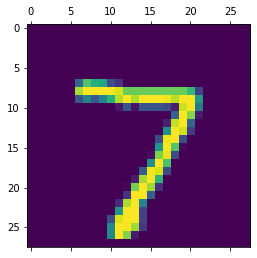

In [37]:
plt.matshow(X_test[0])

In [38]:
np.argmax(y_predicted[0])

7

In [39]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [40]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 959,    0,    2,    2,    0,    6,    6,    2,    3,    0],
       [   0, 1112,    3,    2,    0,    1,    4,    2,   11,    0],
       [   6,    8,  930,   14,    9,    4,    9,    9,   39,    4],
       [   3,    0,   21,  918,    0,   26,    2,   12,   20,    8],
       [   2,    1,    6,    1,  925,    0,    7,    4,   11,   25],
       [  10,    3,    7,   30,   10,  776,   11,    6,   33,    6],
       [  12,    3,   10,    1,    8,   10,  907,    2,    5,    0],
       [   1,    5,   23,    6,    7,    0,    0,  958,    4,   24],
       [   4,    7,    7,   23,    9,   20,    8,   12,  878,    6],
       [  10,    7,    1,    9,   32,    7,    0,   27,    9,  907]])>

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Using Hidden Layer

In [45]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(X_train_flattend, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2819 - accuracy: 0.9184
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1306 - accuracy: 0.9614
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0911 - accuracy: 0.9730
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0704 - accuracy: 0.9786
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0549 - accuracy: 0.9835


In [46]:
model.evaluate(X_test_flattend,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0793 - accuracy: 0.9752


[0.07932599633932114, 0.9751999974250793]

Text(69.0, 0.5, 'Truth')

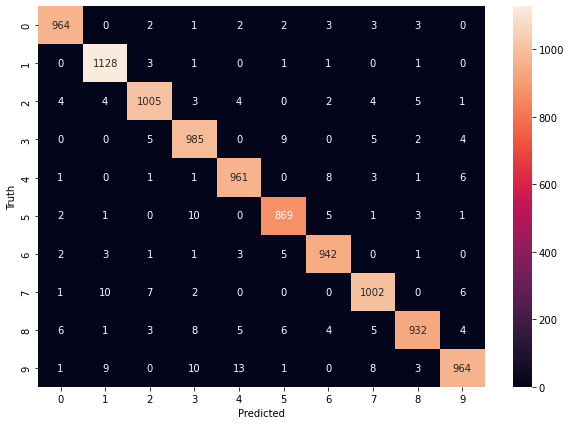

In [48]:
y_predicted = model.predict(X_test_flattend)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Using Flatten layer so that we don't have to call .reshape on input dataset

In [50]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2736 - accuracy: 0.9230
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1249 - accuracy: 0.9638
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0887 - accuracy: 0.9734
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0674 - accuracy: 0.9792
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0525 - accuracy: 0.9839
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0422 - accuracy: 0.9867
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0348 - accuracy: 0.9894
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0283 - accuracy: 0.9909
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0231 - accuracy: 0.9930
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.020

In [51]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0834 - accuracy: 0.9773


[0.08339639008045197, 0.9772999882698059]

In [52]:
y_predicted=model.predict(X_test)
y_predicted[0]

array([6.5448323e-05, 3.7193979e-05, 2.5802165e-02, 9.1718030e-01,
       1.5459959e-07, 7.4511766e-04, 1.0194162e-07, 9.9999768e-01,
       6.6829026e-03, 7.1900994e-02], dtype=float32)

In [53]:
np.argmax(y_predicted[0])

7

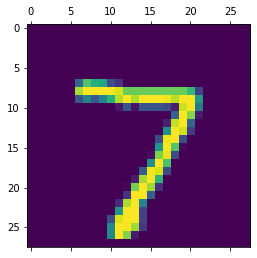

In [55]:
plt.matshow(X_test[0])